# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [277]:
import pandas as pd
import plotly.express as px

# Notebook Presentation

In [278]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [279]:
df_apps = pd.read_csv('apps.csv')

# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [280]:
df_apps.shape

(10841, 12)

In [281]:
list(df_apps.columns)

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size_MBs',
 'Installs',
 'Type',
 'Price',
 'Content_Rating',
 'Genres',
 'Last_Updated',
 'Android_Ver']

In [282]:
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social,"July 28, 2017",4.1 and up
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education,"April 15, 2016",3.0 and up
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization,"July 11, 2018",4.2 and up
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business,"August 6, 2018",4.1 and up


In [283]:
df_apps.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
2397,Penny Puss,TOOLS,3.00,19,22.00,"1,000",Paid,$4.99,Everyone,Tools,"July 9, 2016",4.0 and up
4384,Doctr – ER wait times in Canada,MEDICAL,4.20,980,11.00,"50,000",Free,0,Everyone,Medical,"August 4, 2018",Varies with device
285,BH Bikes GPS Locator,SPORTS,NaN,0,10.00,10,Free,0,Everyone,Sports,"July 19, 2018",5.0 and up
62,FH Wallet,FINANCE,NaN,0,9.90,1,Free,0,Everyone,Finance,"July 26, 2018",4.1 and up
3866,Cook'n Recipe App,LIFESTYLE,3.40,552,22.00,"10,000",Free,0,Everyone,Lifestyle,"August 2, 2018",4.4 and up


### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [284]:
df_apps.drop(columns=['Last_Updated', 'Android_Ver'], inplace=True)
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business


### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [285]:
int(df_apps.isna().any().sum())

2

In [286]:
df_apps_clean = df_apps.dropna()
df_apps_clean.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical


In [287]:
int(df_apps_clean.isna().any().sum())

0

In [288]:
df_apps_clean.shape

(9367, 10)

### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [289]:
df_apps_clean = df_apps_clean.drop_duplicates()
print(df_apps_clean.shape)
df_apps_clean.head()

(8891, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical


In [290]:
df_apps_clean = df_apps_clean.drop_duplicates(subset=['App', 'Type', 'Price'])
print(df_apps_clean.shape)
df_apps_clean.head()

(8199, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical


# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [291]:
max_rating=df_apps_clean.Rating.max()
df_apps_high_ratings = df_apps_clean[df_apps_clean['Rating']== max_rating]
print(df_apps_high_ratings.shape)
df_apps_high_ratings.head()

(271, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical


# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [292]:
df_apps_large_apps = df_apps_clean.sort_values('Size_MBs', ascending=False)
print(df_apps_large_apps.shape)
df_apps_large_apps.head()

(8199, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness


# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [293]:
df_apps_large_apps = df_apps_clean.sort_values('Reviews', ascending=False)
print(df_apps_large_apps.shape)
df_apps_large_apps.head() # top-reviewed apps are all free

(8199, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy


# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [294]:
ratings = df_apps_clean.Content_Rating.value_counts()
ratings

Content_Rating
Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [295]:
fig = px.pie(labels=ratings.index, values=ratings.values)

fig.show()

In [296]:
# add some styling

fig = px.pie(labels=ratings.index, 
             values=ratings.values,
             title='Content Rating',
             names=ratings.index
            )
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

In [297]:
# add hole to make donut

fig = px.pie(labels=ratings.index, 
             values=ratings.values,
             title='Content Rating',
             names=ratings.index,
             hole=0.6
            )
fig.update_traces(textposition='inside',
                  textfont_size=15, 
                  textinfo='percent')
fig.show()

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [298]:
df_apps_clean.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical


In [299]:
type(df_apps_clean['Installs'].iloc[0])

str

In [300]:
df_apps_clean["Installs"] = df_apps_clean["Installs"].str.replace(",","").astype(float)
print(type(df_apps_clean['Installs'].iloc[0]))
df_apps_clean.head()

<class 'numpy.float64'>


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1.00,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1.00,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1.00,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5.00,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5.00,Free,0,Everyone,Medical


In [301]:
installs = df_apps_clean.Installs.value_counts()
installs

Installs
1,000,000.00        1417
100,000.00          1096
10,000.00            988
10,000,000.00        933
1,000.00             698
5,000,000.00         607
500,000.00           504
50,000.00            457
5,000.00             425
100.00               303
50,000,000.00        202
500.00               199
100,000,000.00       189
10.00                 69
50.00                 56
500,000,000.00        24
1,000,000,000.00      20
5.00                   9
1.00                   3
Name: count, dtype: int64

# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [302]:
prices = df_apps_clean.Price.value_counts()
prices

Price
0         7595
$2.99      109
$0.99      104
$4.99       68
$1.99       59
          ... 
$33.99       1
$3.08        1
$4.59        1
$37.99       1
$2.90        1
Name: count, Length: 73, dtype: int64

In [303]:
df_apps_clean["Price"] = df_apps_clean["Price"].str.replace("$","").astype(float)
df_apps_clean.sort_values('Price', ascending=False, inplace=True)
df_apps_clean.head(20)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,"10,000.00",Paid,400.00,Everyone,Lifestyle
2461,I AM RICH PRO PLUS,FINANCE,4.00,36,41.00,"1,000.00",Paid,399.99,Everyone,Finance
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,"50,000.00",Paid,399.99,Everyone,Finance
3145,I am rich(premium),FINANCE,3.50,472,0.94,"5,000.00",Paid,399.99,Everyone,Finance
3554,💎 I'm rich,LIFESTYLE,3.80,718,26.00,"10,000.00",Paid,399.99,Everyone,Lifestyle
5765,I am rich,LIFESTYLE,3.80,3547,1.80,"100,000.00",Paid,399.99,Everyone,Lifestyle
1946,I am rich (Most expensive app),FINANCE,4.10,129,2.70,"1,000.00",Paid,399.99,Teen,Finance
2775,I Am Rich Pro,FAMILY,4.40,201,2.70,"5,000.00",Paid,399.99,Everyone,Entertainment
3221,I am Rich Plus,FAMILY,4.00,856,8.70,"10,000.00",Paid,399.99,Everyone,Entertainment
3114,I am Rich,FINANCE,4.30,180,3.80,"5,000.00",Paid,399.99,Everyone,Finance


### The most expensive apps sub $250

In [304]:
df_apps_clean = df_apps_clean[df_apps_clean['Price'] <= 250]
df_apps_clean.head(20)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
2281,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32.00,"1,000.00",Paid,79.99,Everyone,Medical
1407,LTC AS Legal,MEDICAL,4.00,6,1.30,100.00,Paid,39.99,Everyone,Medical
2629,I am Rich Person,LIFESTYLE,4.20,134,1.80,"1,000.00",Paid,37.99,Everyone,Lifestyle
2481,A Manual of Acupuncture,MEDICAL,3.50,214,68.00,"1,000.00",Paid,33.99,Everyone,Medical
4264,Golfshot Plus: Golf GPS,SPORTS,4.10,3387,25.00,"50,000.00",Paid,29.99,Everyone,Sports
504,AP Art History Flashcards,FAMILY,5.00,1,96.00,10.00,Paid,29.99,Mature 17+,Education
2207,EMT PASS,MEDICAL,3.40,51,2.40,"1,000.00",Paid,29.99,Everyone,Medical
2463,PTA Content Master,MEDICAL,4.20,64,41.00,"1,000.00",Paid,29.99,Everyone,Medical
3241,"Muscle Premium - Human Anatomy, Kinesiology, B...",MEDICAL,4.20,168,25.00,"10,000.00",Paid,24.99,Everyone,Medical
4772,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.50,2921,25.00,"100,000.00",Paid,24.99,Everyone,Medical


### Highest Grossing Paid Apps (ballpark estimate)

In [305]:
df_apps_clean['Revenue_Estimate'] = df_apps_clean['Price'] * df_apps_clean['Installs']
df_apps_clean.sort_values('Revenue_Estimate', ascending=False, inplace=True)
df_apps_clean.head(10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,"10,000,000.00",Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,"10,000,000.00",Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,"1,000,000.00",Paid,6.99,Mature 17+,Action,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,"1,000,000.00",Paid,5.99,Everyone,Photography,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,"1,000,000.00",Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,"1,000,000.00",Paid,4.99,Everyone,Action,"4,990,000.00"
6082,Weather Live,WEATHER,4.50,76593,4.75,"500,000.00",Paid,5.99,Everyone,Weather,"2,995,000.00"
7954,Bloons TD 5,FAMILY,4.60,190086,94.00,"1,000,000.00",Paid,2.99,Everyone,Strategy,"2,990,000.00"
6856,Threema,COMMUNICATION,4.50,51110,3.50,"1,000,000.00",Paid,2.99,Everyone,Communication,"2,990,000.00"
6746,Card Wars - Adventure Time,FAMILY,4.30,129603,23.00,"1,000,000.00",Paid,2.99,Everyone 10+,Card;Action & Adventure,"2,990,000.00"


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [306]:
# Find the number of different categories

df_apps_clean.Category.nunique()

33

In [307]:
top10_category = df_apps_clean.Category.value_counts()[:10]
top10_category

Category
FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: count, dtype: int64

In [308]:
top10_category.head()

Category
FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
Name: count, dtype: int64

### Vertical Bar Chart - Highest Competition (Number of Apps)

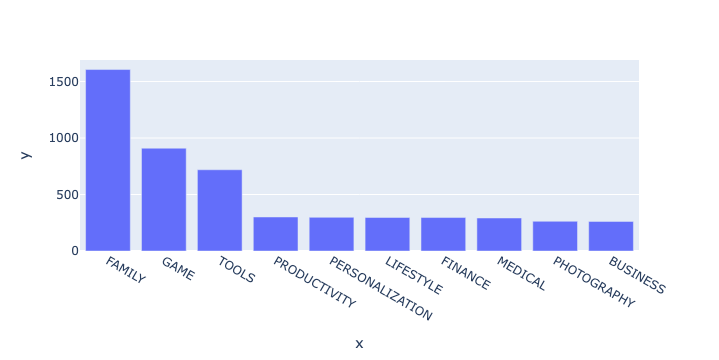

In [311]:
bar = px.bar(x=top10_category.index,
             y=top10_category.values)

bar.show()

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [322]:
category_installs=df_apps_clean.groupby('Category').agg({'Installs': pd.Series.sum})
category_installs.sort_values('Installs', ascending=True, inplace=True)
category_installs.head(10)

,Installs
Category,
EVENTS,"15,949,410.00"
BEAUTY,"26,916,200.00"
PARENTING,"31,116,110.00"
MEDICAL,"39,162,676.00"
COMICS,"44,931,100.00"
LIBRARIES_AND_DEMO,"52,083,000.00"
AUTO_AND_VEHICLES,"53,129,800.00"
HOUSE_AND_HOME,"97,082,000.00"
ART_AND_DESIGN,"114,233,100.00"


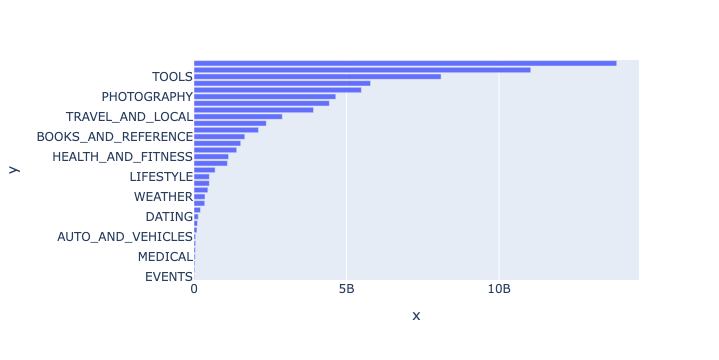

In [323]:
h_bar = px.bar(x=category_installs.Installs,
               y=category_installs.index,
               orientation='h'
              )

h_bar.show()

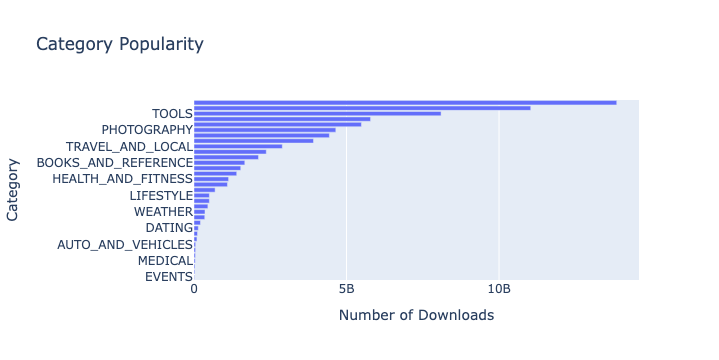

In [324]:
# add title and labels

h_bar = px.bar(x=category_installs.Installs,
               y=category_installs.index,
               orientation='h',
               title='Category Popularity'
              )

h_bar.update_layout(xaxis_title='Number of Downloads', 
                    yaxis_title='Category'
                   )

h_bar.show()

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

In [326]:
category_concentration = df_apps_clean.groupby('Category')\
                                      .agg({'App': pd.Series.nunique, 
                                            'Installs': pd.Series.sum}
                                          )
category_concentration.sort_values('Installs', ascending=False, inplace=True)
category_concentration.head()

,App,Installs
Category,,
GAME,910,"13,858,762,717.00"
COMMUNICATION,257,"11,039,241,530.00"
TOOLS,719,"8,099,724,500.00"
PRODUCTIVITY,301,"5,788,070,180.00"
SOCIAL,203,"5,487,841,475.00"


In [327]:
print(f"The dimension of the category_concentration_df is: {category_concentration.shape}")

The dimension of the category_concentration_df is: (33, 2)


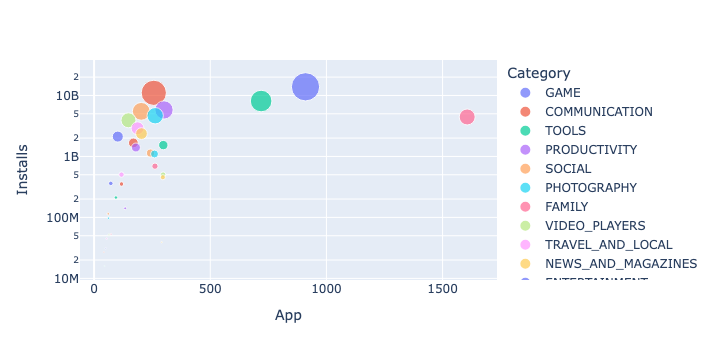

In [334]:
scatter_plot = px.scatter(data_frame=category_concentration,
                          x='App',
                          y='Installs',
                          color=category_concentration.index,
                          size ='Installs',
                          hover_name=category_concentration.index
                         )

scatter_plot.update_layout(yaxis=dict(type='log'))

scatter_plot.show()

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


In [342]:
df_apps_clean.Genres.nunique()

114

In [345]:
df_apps_clean.Genres.value_counts().sort_values(ascending=True).head()

Genres
Lifestyle;Pretend Play                 1
Health & Fitness;Action & Adventure    1
Arcade;Pretend Play                    1
Racing;Pretend Play                    1
Entertainment;Education                1
Name: count, dtype: int64

In [346]:
stack = df_apps_clean.Genres.str.split(';', expand=True).stack()
print(f'We now have a single column with shape: {stack.shape}')
num_genres = stack.value_counts()
print(f'Number of genres: {len(num_genres)}')

We now have a single column with shape: (8564,)
Number of genres: 53


# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

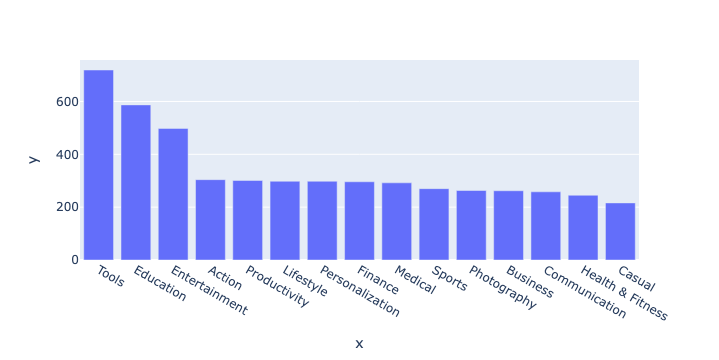

In [347]:
genre_bar = px.bar(x=num_genres.index[:15],
                   y=num_genres.values[:15])

genre_bar.show()

# Grouped Bar Charts: Free vs. Paid Apps per Category

**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.